<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [50]:
!pip install pandas

In [51]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [52]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-17 21:07:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.0MB/s    in 2.3s    

2025-01-17 21:07:44 (67.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



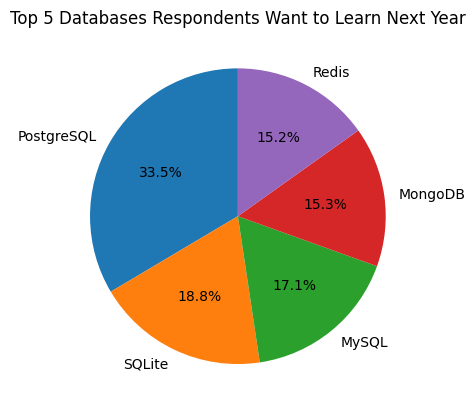

In [53]:
# First, explode out the data in DatabaseWantToWorkWith by splitting it by ';' and stacking the results
df_exploded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['DatabaseWantToWorkWith'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['DatabaseWantToWorkWith', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.ylabel('')  # Hide the y-axis label
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



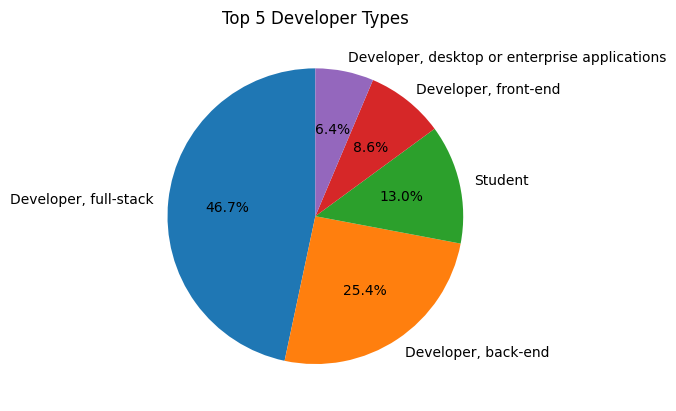

In [54]:
# First, explode out the data in DevType by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['DevType'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['DevType', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['DevType'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Developer Types')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



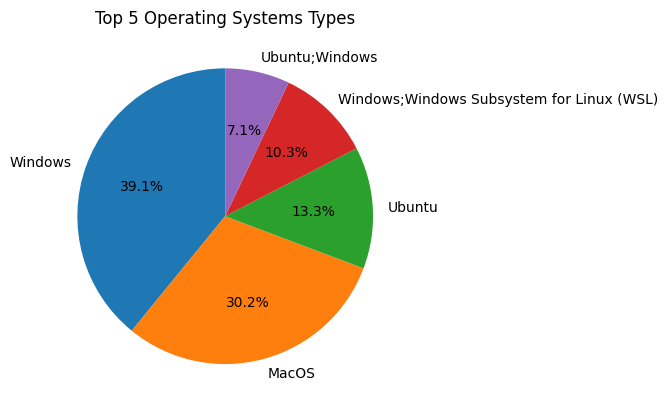

In [55]:
# First, explode out the data in 'OpSysProfessional use' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['OpSysProfessional use'].str.split(';')).explode('OpSysProfessional use')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['OpSysProfessional use'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['OpSysProfessional use', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['OpSysProfessional use'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Operating Systems Types')
plt.ylabel('')  # Hide the y-axis label
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



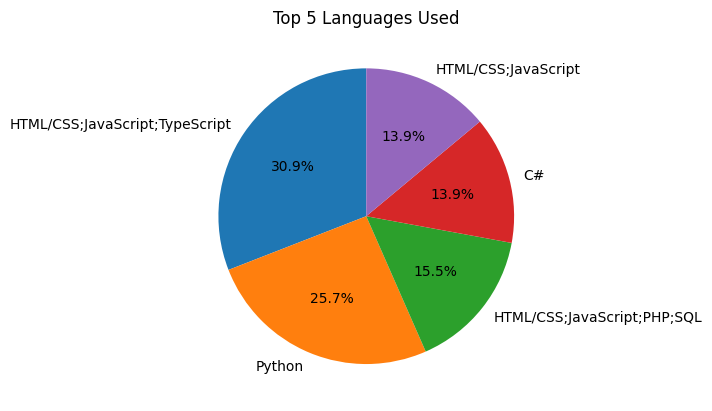

In [56]:
# First, explode out the data in 'LanguageHaveWorkedWith' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['LanguageHaveWorkedWith'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['LanguageHaveWorkedWith', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['LanguageHaveWorkedWith'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Languages Used')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



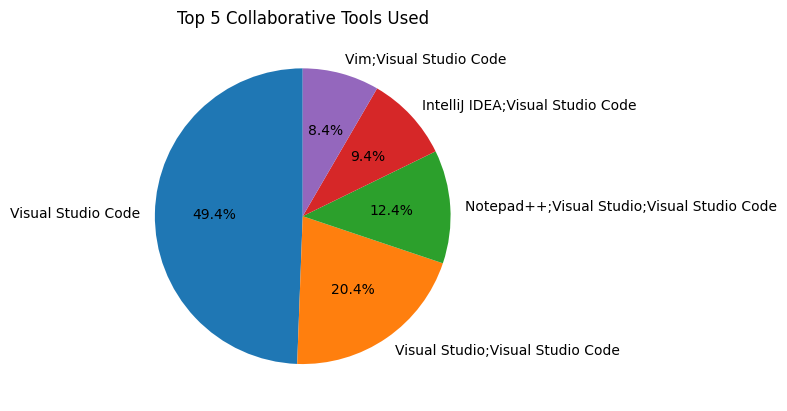

In [57]:
# First, explode out the data in 'NEWCollabToolsHaveWorkedWithh' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['NEWCollabToolsHaveWorkedWith', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['NEWCollabToolsHaveWorkedWith'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Collaborative Tools Used')
plt.ylabel('')  # Hide the y-axis label
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



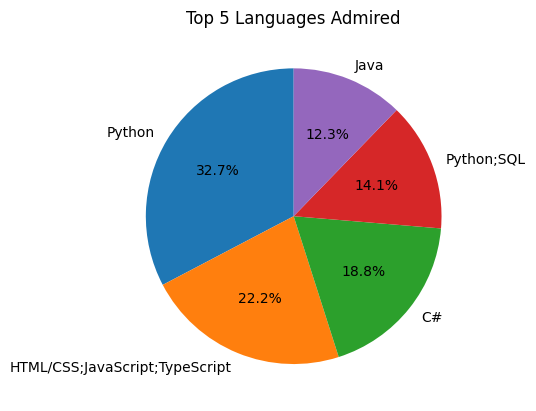

In [58]:
# First, explode out the data in 'LanguageAdmired' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['LanguageAdmired'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['LanguageAdmired', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['LanguageAdmired'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Languages Admired')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



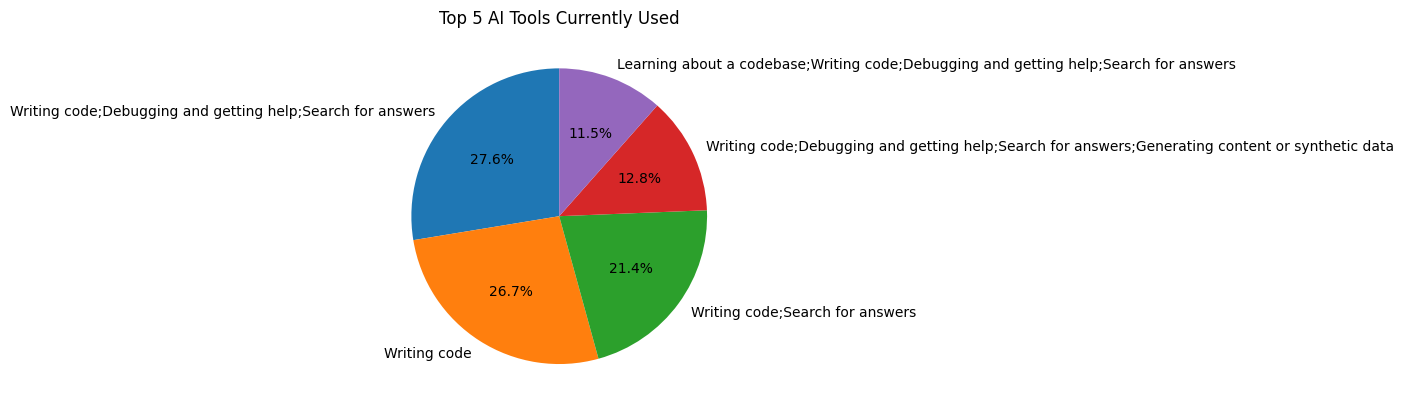

In [59]:
# First, explode out the data in 'AIToolCurrently Using' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['AIToolCurrently Using'].str.split(';')).explode('AIToolCurrently Using')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['AIToolCurrently Using'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['AIToolCurrently Using', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['AIToolCurrently Using'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 AI Tools Currently Used')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



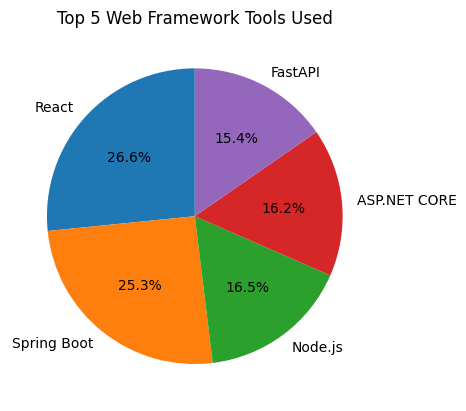

In [60]:
# First, explode out the data in 'WebframeWantToWorkWith' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['WebframeWantToWorkWith'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['WebframeWantToWorkWith', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['WebframeWantToWorkWith'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Web Framework Tools Used')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



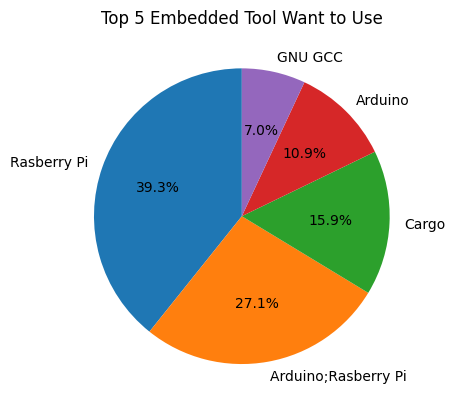

In [61]:
# First, explode out the data in 'EmbeddedWantToWorkWith' by splitting it by ';' and stacking the results
df_exploded = df.assign(DevType=df['EmbeddedWantToWorkWith'].str.split(';')).explode('EmbeddedWantToWorkWith')

# Get the value counts and convert to DataFrame
df_sorted = df_exploded['EmbeddedWantToWorkWith'].value_counts().reset_index()

# Rename the columns
df_sorted.columns = ['EmbeddedWantToWorkWith', 'count']

# Sort the DataFrame by count in descending order
df_sorted = df_sorted.sort_values(by='count', ascending=False)

df_pie = df_sorted.head()
plt.pie(data=df_pie, x='count', labels=df_pie['EmbeddedWantToWorkWith'], autopct='%1.1f%%', startangle=90)

# Display the plot
plt.title('Top 5 Embedded Tool Want to Use')
plt.ylabel('')  # Hide the y-axis label
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
